# 機械学習をPythonで実践する-4

In [52]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sma
from sklearn.model_selection import train_test_split ,LeaveOneOut, cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ○ Ridge

In [74]:
# サンプルデータを取得。pd.read_csvはhttpsでも取ってこれる。
# メジャーリーグの選手の成績と給料等のデータ
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv')

In [75]:
# Salaryはの単位は1,000$
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [76]:
# 統計量を見てみる
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [77]:
# Salaryのcountが他とあっていない　→NaNがあるのでdropnaする
df.dropna(inplace=True)

In [78]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [79]:
# データ準備
y_col = 'Salary'
# 下記のような書き方でも目的変数以外のカラムを取り出せる
X = df.loc[:, df.columns!=y_col]
y = df[y_col]

# 標準化のために量的変数のカラム名のリストを作成。これは質的変数をダミー変数に変換する前にやること。
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()

# ダミー変数作成
X = pd.get_dummies(X, drop_first=True)



In [80]:
numeric_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [81]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,0,1,0


In [82]:
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [83]:
# 量的変数のみ標準化(学習データ、テストデータ両方)
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [84]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
275,0.374183,0.079339,0.759350,-0.036632,0.127298,-0.296460,-1.139596,-0.906175,-0.919988,-0.550834,-0.911932,-0.815974,-0.833650,-0.629885,0.644269,0.260164,0,1,0
134,-1.795062,-1.530461,-0.745509,-1.472432,-0.853766,-1.260217,0.390956,-0.925691,-0.935379,-0.663465,-0.898341,-0.740174,-0.783531,-0.535854,-0.769140,-1.203755,1,1,1
19,-1.904206,-1.684826,-0.398234,-1.552199,-1.180788,-1.308404,0.172306,-0.883803,-0.885785,-0.550834,-0.942512,-0.791856,-0.804414,-0.312965,-0.722249,-1.057363,1,1,1
140,1.322375,0.785006,2.495725,1.199751,2.702594,1.149175,-1.139596,-0.898559,-0.897756,-0.353731,-0.826988,-0.626474,-0.750119,0.094505,-0.842825,0.699339,0,1,0
99,0.121786,0.035235,0.412075,0.601501,-0.158845,-0.248272,-0.046344,-0.215961,-0.263296,-0.353731,-0.031910,-0.474874,0.039246,0.000473,-0.829427,-0.910971,1,1,1


In [85]:
X_train.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
count,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,184.000000,184.000000,184.000000
mean,-1.810146e-16,-1.182629e-16,6.033821e-17,8.930055e-17,1.689470e-17,6.275174e-17,-9.895466e-17,-6.154497e-17,3.982322e-17,9.050731e-18,8.447349e-17,-2.775558e-17,-2.292852e-17,-3.921984e-17,1.134358e-16,2.715219e-18,0.527174,0.538043,0.510870
std,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,0.500623,0.499911,0.501246
min,-2.634109e+00,-2.368440e+00,-1.324301e+00,-2.190332e+00,-2.080097e+00,-1.983034e+00,-1.358246e+00,-1.210345e+00,-1.178218e+00,-8.887262e-01,-1.149776e+00,-1.050265e+00,-1.021594e+00,-1.016458e+00,-8.696190e-01,-1.350147e+00,0.000000,0.000000,0.000000
25%,-8.400484e-01,-7.641520e-01,-7.455091e-01,-7.944153e-01,-8.128886e-01,-7.301504e-01,-7.022951e-01,-7.907427e-01,-8.045538e-01,-6.669846e-01,-8.108485e-01,-7.513715e-01,-7.146184e-01,-6.168251e-01,-8.160301e-01,-7.645792e-01,0.000000,0.000000,0.000000
50%,5.698197e-02,-3.092083e-02,-2.824756e-01,-1.363403e-01,-1.588454e-01,-2.000843e-01,-2.649946e-01,-3.130670e-01,-3.308462e-01,-3.537306e-01,-3.326122e-01,-2.491963e-01,-3.220243e-01,-2.798795e-01,-4.911471e-01,-2.522077e-01,1.000000,1.000000,1.000000
75%,8.022335e-01,7.243624e-01,5.278330e-01,6.513555e-01,7.200251e-01,6.191089e-01,6.096064e-01,5.188791e-01,4.793306e-01,2.974153e-01,3.707264e-01,3.072448e-01,2.574696e-01,8.928055e-02,6.074264e-01,6.993393e-01,1.000000,1.000000,1.000000
max,1.915847e+00,2.857900e+00,3.306034e+00,2.994501e+00,2.702594e+00,3.076688e+00,2.796109e+00,2.939508e+00,3.223671e+00,4.517545e+00,2.822218e+00,3.570091e+00,4.725316e+00,3.779140e+00,2.426101e+00,3.334393e+00,1.000000,1.000000,1.000000


In [86]:
X_test.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,-0.056868,-0.042086,0.069195,-0.023001,0.081764,-0.006113,0.072668,0.117035,0.137915,0.286589,0.190365,0.213258,0.162163,-0.013369,-0.246648,-0.306873,0.341772,0.443038,0.354430
std,1.015103,0.982829,1.043711,1.061051,1.181688,1.148889,1.152103,1.269122,1.324776,1.442645,1.367149,1.333562,1.306809,0.912933,0.877710,0.846288,0.477334,0.499919,0.481397
min,-2.640931,-2.302284,-1.324301,-2.110565,-1.957464,-1.934846,-1.358246,-1.220818,-1.186769,-0.888726,-1.163367,-1.064047,-1.034123,-1.016458,-0.869619,-1.350147,0.000000,0.000000,0.000000
25%,-0.863924,-0.846847,-0.861267,-0.934007,-0.874205,-0.971090,-0.920945,-0.908793,-0.878090,-0.712741,-0.816795,-0.724669,-0.766825,-0.622920,-0.822729,-0.910971,0.000000,0.000000,0.000000
50%,-0.035109,-0.163233,-0.282476,-0.076515,-0.199723,-0.248272,-0.264995,-0.294027,-0.268426,-0.283336,-0.266356,-0.309492,-0.290700,-0.177142,-0.722249,-0.471795,0.000000,0.000000,0.000000
75%,0.824403,0.773980,0.932987,0.880685,1.047047,1.004612,1.046907,0.819598,0.805539,0.899285,0.797147,0.670740,0.711668,0.138038,0.111729,-0.032620,1.000000,1.000000,1.000000
max,1.752131,2.019921,2.495725,2.117068,2.866104,2.691186,3.670710,5.459503,6.084728,6.826473,6.186011,4.641628,5.502151,3.239330,2.359115,2.309650,1.000000,1.000000,1.000000


X_testを標準化しても平均0、標準偏差は1にならないことに注意。  
（学習データの平均と標準偏差を使って計算しているため。）

In [95]:
# Ridgeでモデル学習。λのデフォルト値は1.0
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [96]:
# Salaryを予測
y_pred = ridge.predict(X_test)
y_pred

array([ 513.86364069, 1039.78316991,   47.68216176,  580.94220773,
        569.5598426 ,  350.40223621, 1094.79710479,  433.15718067,
       1512.82453879,  835.9120895 ,  529.10609321,  733.85867062,
        410.1404281 ,  667.75129634,  114.98578228,  456.20780504,
        260.32440943,  797.6079581 ,  954.14199904,  261.90899622,
        201.57047425,  365.58786246,  567.86747547,   79.55225117,
        181.12538425,  385.92438271,  722.69151967,  310.2559701 ,
        192.06254157,  554.77237418,  399.18242435,  736.35534388,
        177.08341553,  233.55861173,  550.65241188,  449.55124911,
        579.76821364,  484.44729327, 1442.76040594,  352.5847412 ,
       1264.08333398,  249.50171218,  151.08498754,  333.93158719,
        701.70401843, 1067.54970839,  376.85763797,  576.93783273,
        927.75488323, 1389.37953291,  413.52430318,  721.9797592 ,
        107.19176591,  204.69197885, 1002.57216563, 1197.57391487,
        413.20662555, 1720.56565173,  191.90846069,  709.49434

In [97]:
y_test

166     640.0
249     487.5
294     185.0
9      1100.0
190     202.5
        ...  
45      305.0
119     362.5
139     100.0
291     425.0
312     550.0
Name: Salary, Length: 79, dtype: float64

In [98]:
# y_predとy_testの残差を算出
mse = mean_squared_error(y_test, y_pred)
mse

118513.26135456553

In [99]:
# MAEを計算
mean_absolute_error(y_test, y_pred)

251.01058042384867

平均して251Kドル(3000万円ぐらい)、真の値からずれている。

In [100]:
# パラメタを見てみる
ridge.coef_

array([-255.99352472,  265.41620796,   49.85450911,  -43.4415344 ,
          6.40827279,  126.64463957,  -39.99788141, -180.02267219,
        242.39467113,  -36.09606293,  281.13852012,   46.31799934,
       -164.64027314,   70.88806172,   41.295514  ,  -34.06922615,
         -8.54724705,  -97.91075067,   35.72441367])

In [101]:
# 単純な線形回帰の場合も見てみる
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

In [102]:
y_pred_lr = lr.predict(X_test)
mean_absolute_error(y_test, y_pred_lr)

255.29028346699457

単純な線形回帰の場合とRidgeを比べると、Ridgeの方がパラメタが小さくMAEも小さい（精度が良い）ことが分かる。

## ○ λを変えたときのRidgeの精度を比較する
さまざまな特徴量からSalaryを予測するモデルを作成する。  
* $\lambda=10^{-3}～10^{3}$（間隔は任意）
* hold-outで学習データとテストデータを7:3で分割
* 評価指標にはMSEを採用
* $\lambda$を増加させたときのMSEの推移をplot
* $\lambda$を増加させたときの特徴量の係数$\theta_j$の推移をplot

In [142]:
# λの用意
lambda_ridge = np.logspace(-3, 3, 10)

# MSEとパラメタを格納するリストを定義
result = {}

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 量的変数のみ標準化(学習データ、テストデータ両方)
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


# Ridgeでモデル学習。
for i,alpha in enumerate(lambda_ridge):    
    ridge = Ridge(alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    result[f'{i}'] = {'lambda of Ridge':alpha, 'MSE': mse, 'coef': ridge.coef_}
    


In [146]:
df_result = pd.DataFrame(result).T
df_result

,lambda of Ridge,MSE,coef
0,0.001,121755.551915,"[-269.207099124932, 273.098530460459, 60.00312..."
1,0.004642,121681.815581,"[-269.5520432595408, 273.7713065519559, 60.095..."
2,0.021544,121370.497542,"[-270.97729243008206, 276.55822753648687, 60.4..."
3,0.1,120379.830491,"[-274.89181778618774, 284.41535980677526, 60.9..."
4,0.464159,118902.544862,"[-272.38271483183553, 284.40326277756844, 56.9..."
5,2.154435,118580.538272,"[-219.79139607069305, 226.19142025443836, 39.1..."
6,10.0,120112.236997,"[-100.60719797832525, 120.3201209261789, 14.66..."
7,46.415888,124278.865805,"[-9.579167407593143, 59.300172757780764, 4.117..."
8,215.443469,134666.863274,"[17.055751658264445, 34.05387633819403, 9.0958..."
9,1000.0,165081.225583,"[13.73989614133467, 17.48886038819092, 9.75680..."


Text(0, 0.5, 'MSE')

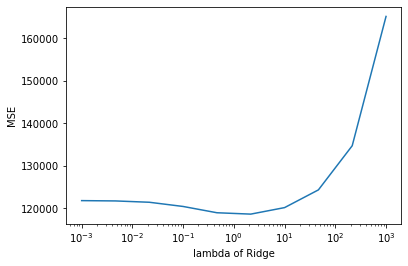

In [156]:
# λとMSEをプロット
plt.plot('lambda of Ridge','MSE',data=df_result)

# 横軸を対数表記にする
plt.xscale('log')
plt.xlabel('lambda of Ridge')
plt.ylabel('MSE')

ValueError: setting an array element with a sequence.

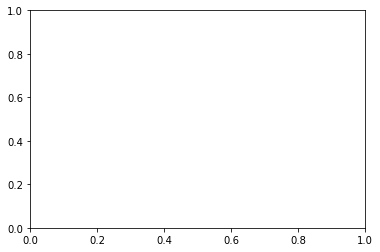

In [155]:
# λとMSEをプロット
fig,axes = plt.subplots()
axes.plot('lambda of Ridge','coef',data=df_result)

# 横軸を対数表記にする
axes.set_xscale('log')
plt.xlabel('lambda of Ridge')
plt.ylabel('coef')